## DONE: Finish `show_scatterplot` and test it and `main`

In [1]:
from cs103 import *
import csv
from typing import List
from typing import NamedTuple
import matplotlib.pyplot as plt



MedicalRecord = NamedTuple('MedicalRecord', [('height', float),  # in range [0.0, ...)
                                             ('weight', float)]) # in range [0.0, ...)
# interp. a record of a person's height in inches and weight in pounds

MR0 = MedicalRecord(65.78331, 112.9925)
MR1 = MedicalRecord(71.51521, 136.4873)
MR2 = MedicalRecord(69.39874, 153.0269)
MR3 = MedicalRecord(68.2166, 142.3354)

# template based on compound (2 fields)
@typecheck
def fn_for_medical_record(mr: MedicalRecord) -> ...:
    return ...(mr.height,
               mr.weight)

# List[MedicalRecord]
# interp. a list of medical records

L0 = []
L1 = [MR0, MR1]

# template based on arbitrary-sized and the reference rule
@typecheck
def fn_for_lomr(lomr: List[MedicalRecord]) -> ...:
    # description of the acc
    acc = ... # type: ...
    for mr in lomr:
        acc = ...(acc,fn_for_medical_record(mr))
    return ...(acc)

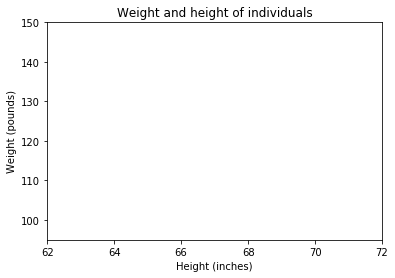

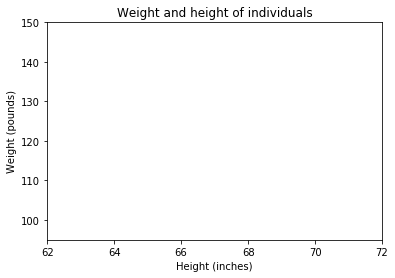

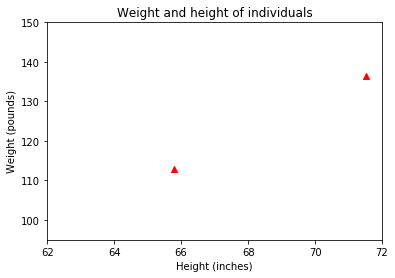

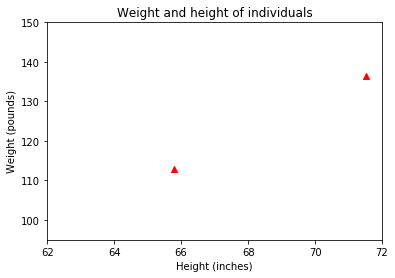

10 of 10 tests passed


In [2]:
@typecheck
def main(filename: str) -> None:
    """
    Reads the medical records from given filename and shows a scatterplot
    of the heights and weights
    """
    # Template from HtDAP, based on composition
    return show_scatterplot(read(filename))

@typecheck
def show_scatterplot(lomr: List[MedicalRecord]) -> None:
    """
    creates a scatterplot of the heights and weights, returns None
    """
    #return None  #stub
    # Template from visualization
    
    # set the labels for the axes
    plt.xlabel('Height (inches)')
    plt.ylabel('Weight (pounds)')
    plt.title('Weight and height of individuals')

    # range for the axes
    # [x-min, x-max, y-min, y-max]
    plt.axis([62,72,95,150])

    # create the scatterplot, with markers that are 
    # red (c='r') and triangular (marker='^')
    plt.scatter(get_heights(lomr),get_weights(lomr),marker='^', c='r')

    # show the plot
    plt.show()  

@typecheck
def get_heights(lomr: List[MedicalRecord]) -> List[float]:
    """
    return a list of heights from lomr
    """
    # return [] #stub
    # list_of_heights contains the result so far
    list_of_heights = [] # type: List[float]
    for mr in lomr:
        list_of_heights.append(mr.height)
    return list_of_heights

@typecheck
def get_weights(lomr: List[MedicalRecord]) -> List[float]:
    """
    return a list of heights from lomr
    """
    # return [] #stub
    list_of_weights = [] # type: List[float]
    for mr in lomr:
        list_of_weights.append(mr.weight)
    return list_of_weights



    
@typecheck
def read(filename: str) -> List[MedicalRecord]:
    """    
    reads information from the specified file and returns a list of medical records
    """
    # return []  #stub
    # Template from HtDAP
    # lomr contains the result so far
    lomr = [] # type: List[MedicalRecord]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            mr = MedicalRecord(parse_float(row[1]), parse_float(row[2])) # we don't need the information from column 0
            lomr.append(mr)
    
    return lomr


    
# Begin testing
start_testing()

# These should both produce empty graphs with: x-axis "Height (inches)",
# y-axis "Weight (pounds)", title "Weight and height of individuals",
# and about 62-72 inches showing on the x axis and about 95-150 pounds on the y.
#
# We created an empty test file to make this work... which wasn't too hard :)
expect(main("heights_and_weights_test_empty.csv"), None)
expect(show_scatterplot([]), None)

# These should both produce graphs similar in labels to the above, but
# with red triangles at about (66,113) and at about (72, 136).
expect(main("heights_and_weights_test1.csv"), None)
expect(show_scatterplot([MR0, MR1]), None)

# Examples and tests for get_heights
expect(get_heights([]), [])
expect(get_heights([MR0, MR1]), [65.78331, 71.51521])

# Examples and tests for get_weights
expect(get_weights([]), [])
expect(get_weights([MR0, MR1]), [112.9925, 136.4873])

# Examples and tests for read
expect(read("heights_and_weights_test1.csv"), [MR0, MR1])
expect(read("heights_and_weights_test2.csv"), [MR2, MR3])



# show testing summary
summary()

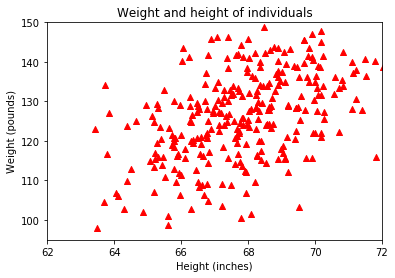

In [3]:
# Call on the big data file:
main("heights_and_weights.csv")